In [1]:
import numpy as np
from astropy.table import Table, vstack

In [2]:
import healpy as hp

In [3]:
from pfstarget import cuts as Cuts
from pfstarget import util as U
from pfstarget import extinction as E

In [4]:
# --- plotting ---
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [5]:
tract = Table.read('/Users/hahnchanghoon/projects/pfstarget/bin/hsc/sql/database/s23-colorterm/sql/0.fits')
for i in range(1,3): 
    _tract = Table.read('/Users/hahnchanghoon/projects/pfstarget/bin/hsc/sql/database/s23-colorterm/sql/%i.fits' % i)
    tract = vstack([tract, _tract])

In [6]:
def targetselect(tract, dust='desi'): 
    hsc = Cuts._prepare_hsc(tract,  dust_extinction=dust)
    is_pfscosmo = Cuts.isCosmology(hsc)
    return hsc[is_pfscosmo] 

In [7]:
target_desi = targetselect(tract, dust='desi') 
target_sfd = targetselect(tract, dust='sfd98') 

/Users/hahnchanghoon/projects/pfstarget/src/pfstarget/cuts.py:85: RuntimeWarning: invalid value encountered in subtract
  cuts &= ((objects['G_MAG'] - objects['R_MAG'] > -1) &
/Users/hahnchanghoon/projects/pfstarget/src/pfstarget/cuts.py:51: RuntimeWarning: invalid value encountered in subtract
  cuts &= (((objects['G_MAG'] - objects['R_MAG']) < g_r_cut) | # g-r cut (for 1.6 < z < 2.4 ELGs)
/Users/hahnchanghoon/projects/pfstarget/src/pfstarget/cuts.py:53: RuntimeWarning: invalid value encountered in subtract
  > color_slope * (objects['G_MAG'] - objects['R_MAG'])- color_yint))


In [8]:
hp_desi = U.healpixelize(target_desi['RA'], target_desi['DEC'], nside=128)
hp_sfd = U.healpixelize(target_sfd['RA'], target_sfd['DEC'], nside=128)

# target number counts

(-10.0, 2.0)

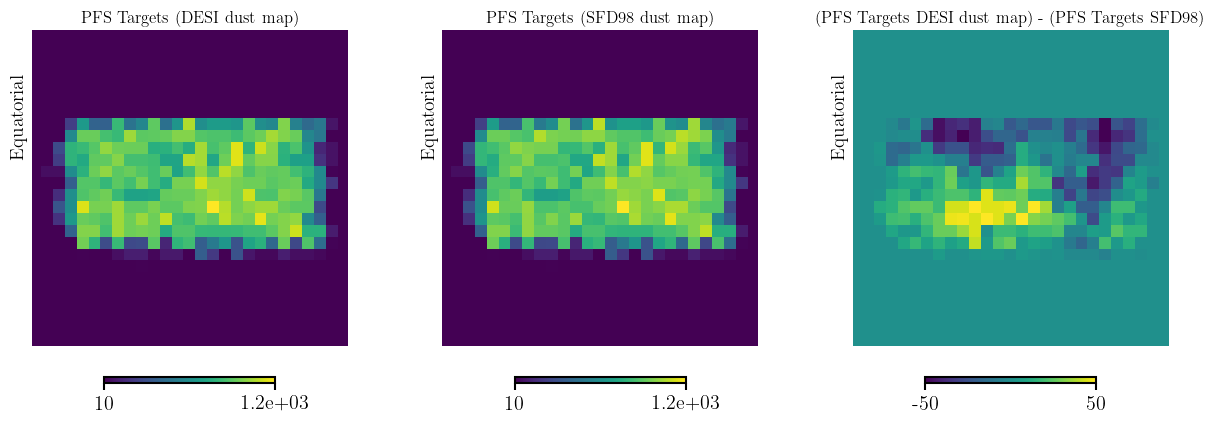

In [9]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(131)
plt.axes(sub)
hp.cartview(hp_desi, title="PFS Targets (DESI dust map)", cmap="viridis", coord=['C'], min=10, max=1.2e3, hold=True)
plt.xlim(-28, -40)
plt.ylim(-10, 2)


sub = fig.add_subplot(132)
plt.axes(sub)
hp.cartview(hp_sfd, title="PFS Targets (SFD98 dust map)", cmap="viridis", coord=['C'], min=10, max=1.2e3, hold=True)
plt.xlim(-28, -40)
plt.ylim(-10, 2)


sub = fig.add_subplot(133)
plt.axes(sub)
hp.cartview(hp_desi - hp_sfd, title="(PFS Targets DESI dust map) - (PFS Targets SFD98)", 
            cmap="viridis", coord=['C'], min=-50, max=50, hold=True)
plt.xlim(-28, -40)
plt.ylim(-10, 2)

# target densities

First get effective area using randoms

In [11]:
for i in range(3): 
    randoms = Table.read('/Users/hahnchanghoon/projects/pfstarget/bin/hsc/sql/database/s23-colorterm/sql/%i.ran.fits' % i)
    randoms_cut = Cuts.random_masking(randoms)
    
    if i == 0: 
        hp_ran_all = U.healpixelize(randoms['ra'], randoms['dec'], nside=128)
        hp_ran = U.healpixelize(randoms[~randoms_cut]['ra'], randoms[~randoms_cut]['dec'], nside=128)
    else: 
        hp_ran_all += U.healpixelize(randoms['ra'], randoms['dec'], nside=128)
        hp_ran += U.healpixelize(randoms[~randoms_cut]['ra'], randoms[~randoms_cut]['dec'], nside=128)

/var/folders/w7/p2lcz8lj0m39n1ywl2_s0_j40000gp/T/ipykernel_40764/2769602794.py:4: RuntimeWarning: invalid value encountered in divide
  hp.cartview(hp_ran/hp_ran_all, title="eff. healpixel", cmap="viridis", coord=['C'], min=0, max=1, hold=True)


(-10.0, 2.0)

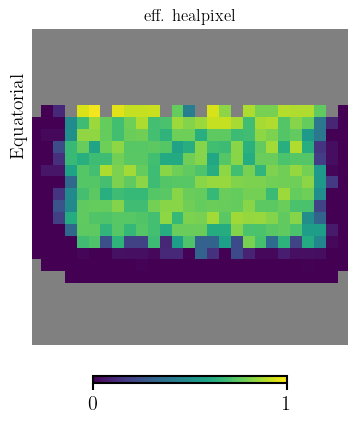

In [12]:
fig = plt.figure(figsize=(5,5))
sub = fig.add_subplot(111)
plt.axes(sub)
hp.cartview(hp_ran/hp_ran_all, title="eff. healpixel", cmap="viridis", coord=['C'], min=0, max=1, hold=True)
plt.xlim(-28, -40)
plt.ylim(-10, 2)

/var/folders/w7/p2lcz8lj0m39n1ywl2_s0_j40000gp/T/ipykernel_40764/3456254867.py:2: RuntimeWarning: invalid value encountered in divide
  hparea = hp.nside2pixarea(128, degrees=True) * (hp_ran/hp_ran_all)
/var/folders/w7/p2lcz8lj0m39n1ywl2_s0_j40000gp/T/ipykernel_40764/3456254867.py:7: RuntimeWarning: invalid value encountered in divide
  hp.cartview(hp_desi/hparea, title="DESI dust map", cmap="viridis", coord=['C'], min=4e3, max=7e3, hold=True,
/var/folders/w7/p2lcz8lj0m39n1ywl2_s0_j40000gp/T/ipykernel_40764/3456254867.py:15: RuntimeWarning: invalid value encountered in divide
  hp.cartview(hp_sfd/hparea, title="SFD98 dust map)", cmap="viridis", coord=['C'], min=4e3, max=7e3, hold=True,
/var/folders/w7/p2lcz8lj0m39n1ywl2_s0_j40000gp/T/ipykernel_40764/3456254867.py:23: RuntimeWarning: invalid value encountered in divide
  hp.cartview((hp_desi - hp_sfd)/hparea, title="(DESI dust) - (SFD98)",


(-10.0, 2.0)

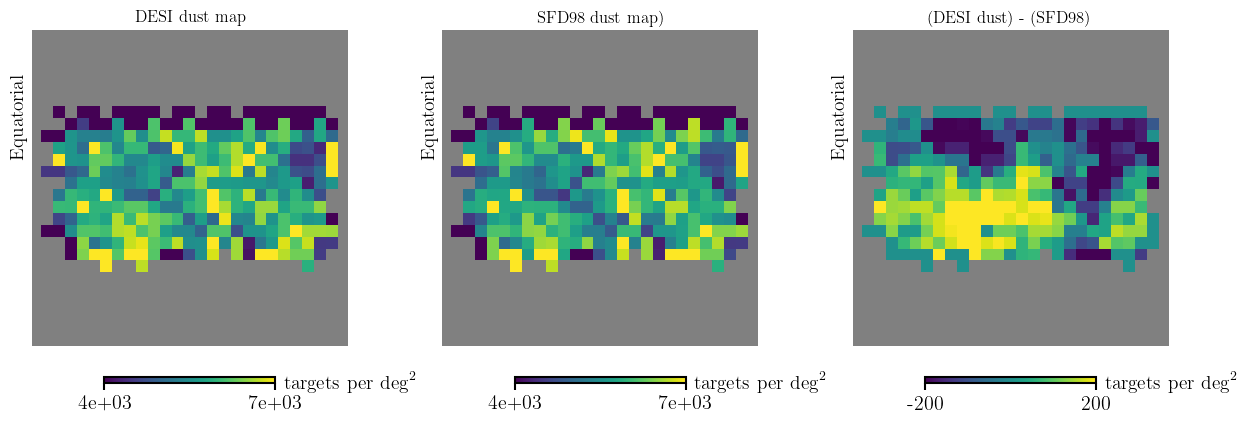

In [13]:
# sq.deg of single healpixel
hparea = hp.nside2pixarea(128, degrees=True) * (hp_ran/hp_ran_all)

fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(131)
plt.axes(sub)
hp.cartview(hp_desi/hparea, title="DESI dust map", cmap="viridis", coord=['C'], min=4e3, max=7e3, hold=True, 
           unit=r"targets per ${\rm deg}^2$")
plt.xlim(-28, -40)
plt.ylim(-10, 2)


sub = fig.add_subplot(132)
plt.axes(sub)
hp.cartview(hp_sfd/hparea, title="SFD98 dust map)", cmap="viridis", coord=['C'], min=4e3, max=7e3, hold=True, 
           unit=r"targets per ${\rm deg}^2$")#, xlabel="RA", ylabel="Dec")
plt.xlim(-28, -40)
plt.ylim(-10, 2)


sub = fig.add_subplot(133)
plt.axes(sub)
hp.cartview((hp_desi - hp_sfd)/hparea, title="(DESI dust) - (SFD98)", 
            cmap="viridis", coord=['C'], min=-2e2, max=2e2, hold=True, unit=r"targets per ${\rm deg}^2$")
plt.xlim(-28, -40)
plt.ylim(-10, 2)

/var/folders/w7/p2lcz8lj0m39n1ywl2_s0_j40000gp/T/ipykernel_40764/1693494252.py:1: RuntimeWarning: invalid value encountered in divide
  targ_dens_desi = (hp_desi/hparea)[(hp_desi/hparea) > 0]


(0.0, 10000.0)

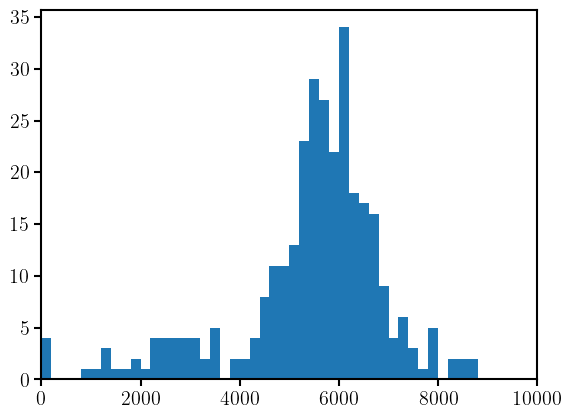

In [14]:
targ_dens_desi = (hp_desi/hparea)[(hp_desi/hparea) > 0]
plt.hist(targ_dens_desi, range=(0., 1e4), bins=50)
plt.xlim(0, 1e4)